# 1. Introduction

## 1.1 The Company
Consider a well-established company operating in the retail food sector with several hundred thousand registered customers, serving nearly one million consumers annually. The company’s product offerings span five major categories:

- Wines
- Rare meat products
- Exotic fruits
- Specially prepared fish
- Sweet products

These categories are further segmented into gold and regular products. Customers can purchase items through three primary sales channels:

1. Physical stores
2. Catalogs
3. Company’s website

Globally, the company has enjoyed solid revenues and a healthy bottom line over the past three years. However, the profit growth outlook for the next three years is less promising. Consequently, several strategic initiatives are being considered to reverse this trend, one of which is enhancing the effectiveness of marketing activities, particularly focusing on marketing campaigns.

## 1.2 The Marketing Department
The marketing department has been tasked with optimizing its annual budget. The Chief Marketing Officer (CMO) recognizes the importance of a quantitative approach in decision-making and, as a result, a small team of data scientists was hired. This team’s objective is to build a predictive model to support direct marketing initiatives. The CMO aims to demonstrate the value of a data-driven approach, hoping it will persuade more skeptical stakeholders within the company.

## 1.3 The Objective
The data science team’s primary objective is to create a predictive model that will yield the highest profit for the upcoming direct marketing campaign, which is scheduled for the next month. This sixth campaign focuses on promoting a new gadget to the Customer Database.

To build the model, a pilot campaign was conducted with a random sample of 2,240 customers who were contacted by phone regarding the gadget. Over the following months, customers who purchased the gadget were labeled accordingly. Key metrics of the pilot campaign include:

- **Total cost**: 6,720 MU
- **Revenue generated**: 3,674 MU
- **Profit**: -3,046 MU
- **Success rate**: 15%

The goal is to develop a model that predicts customer behavior, applying it to the broader customer base. Ideally, the model will enable the company to target only those customers most likely to purchase the gadget, thereby increasing the campaign’s profitability. Additionally, the CMO is interested in analyzing the characteristics of customers who are willing to buy the gadget.

## 1.4 The Data
The dataset includes socio-demographic and firmographic features for the 2,240 customers contacted during the pilot campaign. It also contains a flag indicating customers who responded by purchasing the gadget.

## 1.5 Meta Data

In [578]:
# from google.colab import drive
# drive.mount('/content/drive')

In [579]:
# import os
# os.chdir('/content/drive/MyDrive/UNIVERSITY /SCHOOLWORK/JUNIOR/Machine Learning/FINAL PROJECT/ifood-data-business-analyst-test-master')

In [580]:
!pip install pymupdf pillow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


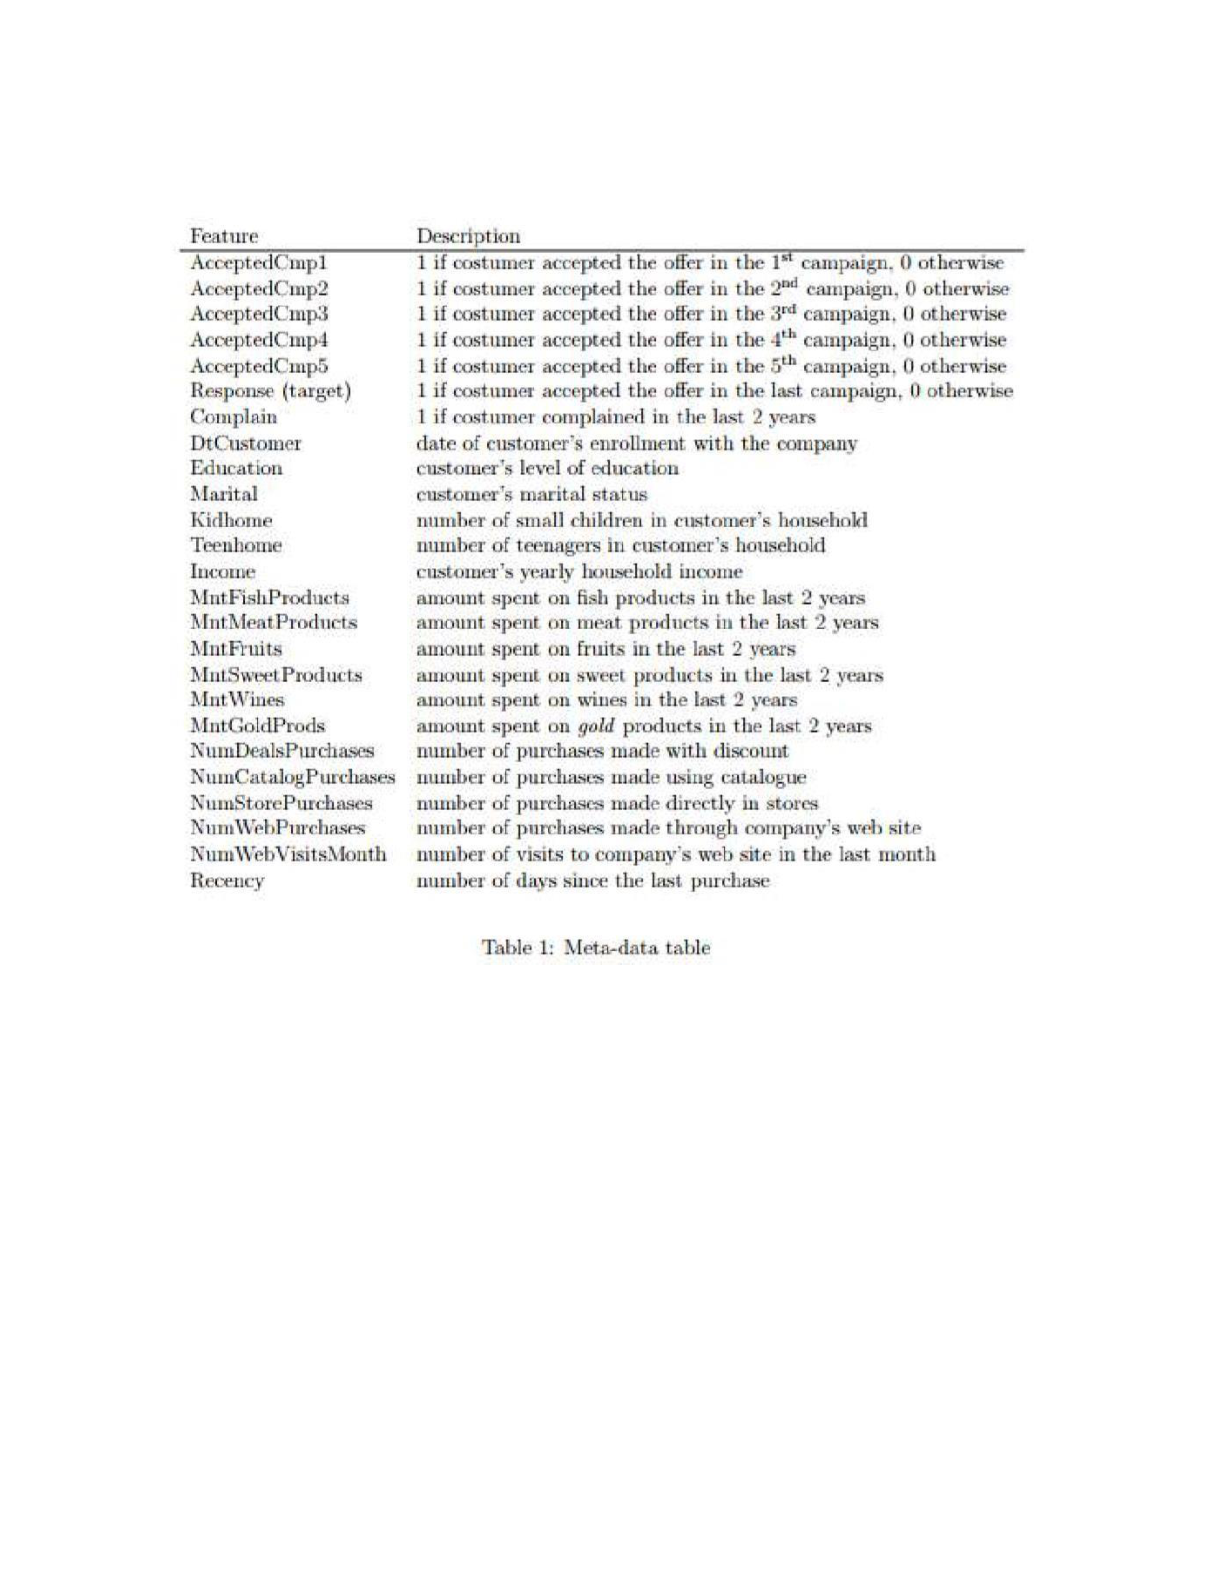

In [581]:
import fitz
from PIL import Image
from io import BytesIO
import IPython.display as display


pdf_path = "iFood Data Analyst Case.pdf"
pdf_document = fitz.open(pdf_path)


page_number = 2
page = pdf_document.load_page(page_number)

# Convert page to an image (use a higher zoom for better resolution)
zoom = 2
matrix = fitz.Matrix(zoom, zoom)
pixmap = page.get_pixmap(matrix=matrix)

# Convert pixmap to PIL Image and display
image = Image.open(BytesIO(pixmap.tobytes("png")))
display.display(image)


# 2. Data Collection and Understanding

In [582]:
# import necessary libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [583]:
# Load training dataset and display first 5 rows
df = pd.read_csv('ml_project1_data.csv')

#display dataset shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

There are 2240 rows and 29 columns.
+----+------+--------------+-------------+------------------+----------+-----------+------------+---------------+-----------+------------+-------------+-------------------+-------------------+--------------------+----------------+---------------------+-------------------+-----------------------+---------------------+---------------------+----------------+----------------+----------------+----------------+----------------+------------+-----------------+-------------+------------+
|    |   ID |   Year_Birth | Education   | Marital_Status   |   Income |   Kidhome |   Teenhome | Dt_Customer   |   Recency |   MntWines |   MntFruits |   MntMeatProducts |   MntFishProducts |   MntSweetProducts |   MntGoldProds |   NumDealsPurchases |   NumWebPurchases |   NumCatalogPurchases |   NumStorePurchases |   NumWebVisitsMonth |   AcceptedCmp3 |   AcceptedCmp4 |   AcceptedCmp5 |   AcceptedCmp1 |   AcceptedCmp2 |   Complain |   Z_CostContact |   Z_Revenue |   Respons

In [584]:
def check_data(data):
    """check prerequisite dataset characteristics, including data types, null values, duplicates, etc.
    """
    dict={}
    for col in data.columns:
        dtype = data[col].dtypes
        valid_instances = data[col].count()
        unique = data[col].nunique()
        null_count = data[col].isnull().sum()
        null_pct = round((null_count/valid_instances)*100,2)
        duplicates = data[col].duplicated().sum()
        dict[col] = dtype,valid_instances,unique,null_count, null_pct, duplicates
        data_check = pd.DataFrame(dict, index=["dtype","valid_instances","unique","total_null","null_pct","duplicates"]).T
    return data_check

check_data(df)

dtype valid_instances unique total_null null_pct  \
ID                     int64            2240   2240          0      0.0   
Year_Birth             int64            2240     59          0      0.0   
Education             object            2240      5          0      0.0   
Marital_Status        object            2240      8          0      0.0   
Income               float64            2216   1974         24     1.08   
Kidhome                int64            2240      3          0      0.0   
Teenhome               int64            2240      3          0      0.0   
Dt_Customer           object            2240    663          0      0.0   
Recency                int64            2240    100          0      0.0   
MntWines               int64            2240    776          0      0.0   
MntFruits              int64            2240    158          0      0.0   
MntMeatProducts        int64            2240    558          0      0.0   
MntFishProducts        int64            2240    182          0      0.0   
MntSweetProducts       int64            2240    177          0      0.0   
MntGoldProds           int64            2240    213          0      0.0   
NumDealsPurchases      int64            2240     15          0      0.0   
NumWebPurchases        int64            2240     15          0      0.0   
NumCatalogPurchases    int64            2240     14          0      0.0   
NumStorePurchases      int64            2240     14          0      0.0   
NumWebVisitsMonth      int64            2240     16          0      0.0   
AcceptedCmp3           int64            2240      2          0      0.0   
AcceptedCmp4           int64            2240      2          0      0.0   
AcceptedCmp5           int64            2240      2          0      0.0   
AcceptedCmp1           int64            2240      2          0      0.0   
AcceptedCmp2           int64            2240      2          0      0.0   
Complain               int64            2240      2          0      0.0   
Z_CostContact          int64            2240      1          0      0.0   
Z_Revenue              int64            2240      1          0      0.0   
Response               int64            2240      2          0      0.0   

                    duplicates  
ID                           0  
Year_Birth                2181  
Education                 2235  
Marital_Status            2232  
Income                     265  
Kidhome                   2237  
Teenhome                  2237  
Dt_Customer               1577  
Recency                   2140  
MntWines                  1464  
MntFruits                 2082  
MntMeatProducts           1682  
MntFishProducts           2058  
MntSweetProducts          2063  
MntGoldProds              2027  
NumDealsPurchases         2225  
NumWebPurchases           2225  
NumCatalogPurchases       2226  
NumStorePurchases         2226  
NumWebVisitsMonth         2224  
AcceptedCmp3              2238  
AcceptedCmp4              2238  
AcceptedCmp5              2238  
AcceptedCmp1              2238  
AcceptedCmp2              2238  
Complain                  2238  
Z_CostContact             2239  
Z_Revenue                 2239  
Response                  2238

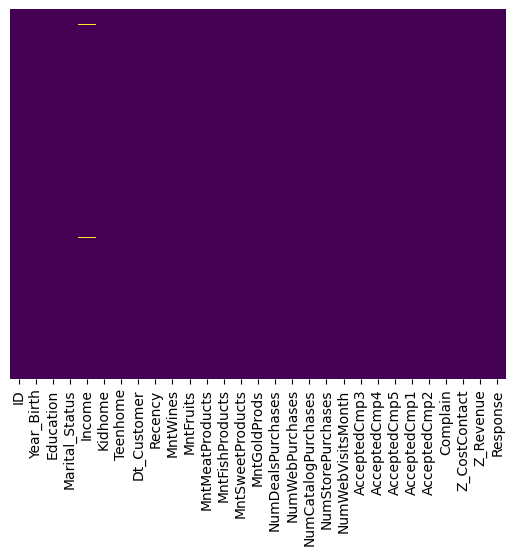

In [585]:
# check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

---

Since the number of missing values are negligible (only 1%),  I will consider the necessity of filling the missing values of Income attribute or basing on relevant attributes along with central tendency (or probably taken into account the use of decision tree classifier to find the most optimal approach unless correlated attributes are hardly identifiable)

---


In [586]:
# check data duplicates

print(f"Total number of duplicates: {df.duplicated().sum()}")

Total number of duplicates: 0


In [587]:
def check_unique(data):
    """check unique values in each column
    """
    nunique=data.apply(lambda col: col.nunique())
    unique_values = data.apply(lambda col: list(col.unique()))
    data_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return data_check

#display all unique values
pd.set_option('display.max_colwidth', None)
print(tabulate(check_unique(df), headers='keys', tablefmt='psql'))

pd.reset_option('display.max_colwidth')

+---------------------+-------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [588]:
# display summary statistics for numerical columns
df.select_dtypes(exclude='object').describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

# 3. Data Preprocessing & Feature Engineering

## 3.1 Define Column Reordering Function

In [589]:
def col_order(data,col,des):
    """define function to reorder columns when necessary
    """
    col_index=data.columns.get_loc(des)
    data.insert(col_index,col,data.pop(col))

## 3.2 Standardize Column Names

In [590]:
# standardize column names
import re

df.columns = [re.sub(r'(?<=[a-z])([A-Z])', r'_\1', i).replace(' ', '_').lower() for i in df.columns]

print(f"New column names:\n {df.columns}")

New column names:
 Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')


## 3.3 Checking Outliers

In [591]:
fig = px.box(data_frame=df.select_dtypes(include=np.number),orientation="h")
fig.update_layout(
    width=1000,
    height=500
)

---
<p style="font-size:22px; font-weight:bold">🔹 Quick Bits: </p>

- It is discernible that many of the numerical features within the dataset contains outliers.
- However, the majority of outliers' values apparently fall relatively close to the fence (or colloquially common range), there is absolutely no extreme outlier in the dataset  

> This requires further scrutiny into the total number of outliers for each feature, comparing their values/common characteristics, etc

---


In [592]:
def check_outliers(data):
    """check outliers and return outliers values for each attribute"""
    outliers = {}

    for col in data.select_dtypes(include=np.number).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers[col] = col_outliers


    print("Summary Statistics for TelCom customers' attributes:")
    print(tabulate(data.describe(), headers='keys', tablefmt='pretty'))
    print("\n\n")

    print("OUTLIERS BREAKDWOWN: \n")
    for col, outlier_data in outliers.items():
        if len(outlier_data) == 0:
            continue
        else:
            print("\n")
            print(f"Outliers in {col}:", len(outlier_data),f" - Accounting for {round(len(outlier_data)/len(data)*100,2)}% of data")
            print("Upper 5 outliers:\n",tabulate(outlier_data.sort_values(by=col, ascending=False).head(), headers='keys', tablefmt='pretty'))
            print("Lower 5 outliers:\n",tabulate(outlier_data.sort_values(by=col, ascending=False).tail(), headers='keys', tablefmt='pretty'))
            print("\n")
            print("#"*200)

check_outliers(df)



Summary Statistics for TelCom customers' attributes:
+-------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+---------------------+-------------------+-----------------------+---------------------+----------------------+---------------------+---------------------+---------------------+---------------------+----------------------+---------------------+----------------+-----------+---------------------+
|       |         id         |     year_birth     |       income       |       kidhome       |      teenhome      |      recency       |     mnt_wines     |     mnt_fruits     | mnt_meat_products | mnt_fish_products | mnt_sweet_products |  mnt_gold_prods   | num_deals_purchases | num_web_purchases | num_catalog_purchases | num_store_purchases | num_web_visits_month |    accepted_cmp3    |  

---

The majority of features have proportion of outliers being lower than 10%, many of which are from binary features of campaign acceptance. This is understandable since most wont likely partake in those campaigns.

---

In [593]:
from plotly.subplots import make_subplots

def plot_top_outliers(data):
    """plot histogram of attributes with highest proportion of outliers"""
    outliers = {}
    top_outliers_list = []

    for col in data.select_dtypes(include=np.number).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers[col] = col_outliers

        outliers_pct = len(col_outliers)/len(data)

        if outliers_pct > 0.05:
            top_outliers_list.append(col)
        else:
            pass

    rows = len(top_outliers_list) // 3 + 1
    fig = make_subplots(rows=rows, cols=3)

    for i, col in enumerate(top_outliers_list):
        fig.add_trace(
            go.Histogram(x=data[col], name=col),
            row=i // 3 + 1,
            col=i % 3 + 1
        )

        fig.update_xaxes(title_text=col, row=i // 3 + 1, col=i % 3 + 1)

    fig.update_layout(
        barmode='stack',
        title='Histogram of attributes with the highest proportion of outliers',
        showlegend=False,
        width=1000,
        height=300 * rows
    )
    fig.show()

plot_top_outliers(df)



## 3.4 EDA & Feature Engineering

In [ ]:
# plot a pairplot with "Response" as hue to see the overall relationship between attributes
col_to_exclude = ['z_revenue','z_cost_contact','id']
plt.figure(figsize=(20, 20))
sns.pairplot(df.select_dtypes(include=[np.number,'bool']).drop(columns=col_to_exclude), hue='response', diag_kind='kde', palette='coolwarm')
plt.show()

### Potential Directions for Re-engineering dataset's attributes


---

**1. Convert Year of Birth to Age**
- Description: Calculate the age of individuals from their year of birth.
- Transformation:
  - Create an `Age` feature by subtracting the year of birth from the current year.
  - `Optional Binning`: Group ages into bins (e.g., 18–25, 26–35, etc.) to reduce variability, basing on distribution (later EDA).

**2. Ordinal Encoding for Education**
- Description: Transform education levels into ordered integer values.
- Transformation:
  - Map education categories (e.g., "High School," "Bachelor's," "Master's") to integers based on a defined order (e.g., 1, 2, 3).
  
**3. Normalize Income**
- Description: Standardize or normalize the income feature for scale consistency.
- Transformation:
  - Apply normalization or standardization to the income attribute to ensure it falls within a common range.

**4. Create Binary Features for Children and Teenagers at Home**
- Description: Flag the presence of children or teenagers at home.
- Transformation:
  - Create two binary features, `Has_Kid` and `Has_Teen`, indicating the presence of children and teenagers at home.
  
**Summary of Transformation**

| Feature Characteristics           | Original Attribute |Transformation              | New Feature (not official name)       |
|-------------------|--------------------|------------------------------|-------------------|
| Year of Birth     | Year of Birth      | Convert to age               | Age              |
| Education         | Education Level    | Ordinal encoding             | Education_Ordinal |
| Income            | Income             | Normalization or Standardization | Normalized_Income |
| Children at Home  | No of Children/Teenagers | Create binary flags          | Has_Kid, Has_Teen |


---

In [595]:
# year_birth conversion to age, assuming the year of analytics is 2020
df['age'] = 2020 - df['year_birth']

# education to ordinal int
df['education'] = df['education'].map({'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5})

# total no of days being customer (from first purchase to latest purchase)
df['total_days_active'] = (pd.to_datetime("2020-02-19") - pd.to_datetime(df['dt_customer'])).dt.days - df.recency

# total amount spent
df['total_mnt_spent'] = df[df.columns[df.columns.str.contains('mnt_')]].sum(axis=1)

# total campaigns accepted
df["total_cmp_accepted"] = df[df.columns[df.columns.str.contains('cmp')]].sum(axis=1)



In [596]:
check_data(df)

dtype valid_instances unique total_null null_pct  \
id                       int64            2240   2240          0      0.0   
year_birth               int64            2240     59          0      0.0   
education                int64            2240      5          0      0.0   
marital_status          object            2240      8          0      0.0   
income                 float64            2216   1974         24     1.08   
kidhome                  int64            2240      3          0      0.0   
teenhome                 int64            2240      3          0      0.0   
dt_customer             object            2240    663          0      0.0   
recency                  int64            2240    100          0      0.0   
mnt_wines                int64            2240    776          0      0.0   
mnt_fruits               int64            2240    158          0      0.0   
mnt_meat_products        int64            2240    558          0      0.0   
mnt_fish_products        int64            2240    182          0      0.0   
mnt_sweet_products       int64            2240    177          0      0.0   
mnt_gold_prods           int64            2240    213          0      0.0   
num_deals_purchases      int64            2240     15          0      0.0   
num_web_purchases        int64            2240     15          0      0.0   
num_catalog_purchases    int64            2240     14          0      0.0   
num_store_purchases      int64            2240     14          0      0.0   
num_web_visits_month     int64            2240     16          0      0.0   
accepted_cmp3            int64            2240      2          0      0.0   
accepted_cmp4            int64            2240      2          0      0.0   
accepted_cmp5            int64            2240      2          0      0.0   
accepted_cmp1            int64            2240      2          0      0.0   
accepted_cmp2            int64            2240      2          0      0.0   
complain                 int64            2240      2          0      0.0   
z_cost_contact           int64            2240      1          0      0.0   
z_revenue                int64            2240      1          0      0.0   
response                 int64            2240      2          0      0.0   
age                      int64            2240     59          0      0.0   
total_days_active        int64            2240    704          0      0.0   
total_mnt_spent          int64            2240   1054          0      0.0   
total_cmp_accepted       int64            2240      5          0      0.0   

                      duplicates  
id                             0  
year_birth                  2181  
education                   2235  
marital_status              2232  
income                       265  
kidhome                     2237  
teenhome                    2237  
dt_customer                 1577  
recency                     2140  
mnt_wines                   1464  
mnt_fruits                  2082  
mnt_meat_products           1682  
mnt_fish_products           2058  
mnt_sweet_products          2063  
mnt_gold_prods              2027  
num_deals_purchases         2225  
num_web_purchases           2225  
num_catalog_purchases       2226  
num_store_purchases         2226  
num_web_visits_month        2224  
accepted_cmp3               2238  
accepted_cmp4               2238  
accepted_cmp5               2238  
accepted_cmp1               2238  
accepted_cmp2               2238  
complain                    2238  
z_cost_contact              2239  
z_revenue                   2239  
response                    2238  
age                         2181  
total_days_active           1536  
total_mnt_spent             1186  
total_cmp_accepted          2235

In [597]:
import scipy.stats as stats

# Define a function to perform a two-sample t-test on any given column
def t_test_between_groups(df, column, group_col='response', alpha=0.05):
    """
    Perform a t-test between two groups for a specific column.

    Parameters:
    - df: DataFrame containing the data
    - column: Column on which to perform the t-test
    - group_col: Column that defines the groups (default is 'churn')
    - alpha: Significance level for the t-test (default is 0.05)

    Returns:
    - t_stat: T-statistic value
    - p_value: P-value of the t-test
    - result: String indicating whether the difference is significant or not
    """

    group_1 = df[df[group_col] == True][column]
    group_2 = df[df[group_col] == False][column]

    # Perform a two-sample t-test
    t_stat, p_value = stats.ttest_ind(group_1, group_2, equal_var=False)

    # Interpret the result
    if p_value < alpha:
        result = f"The difference in {column} between the two classes of response is statistically significant."
    else:
        result = f"The difference in {column} between the two classes of response is not statistically significant."

    print(f"T-statistic: {t_stat}, P-value: {p_value}")
    print(result)

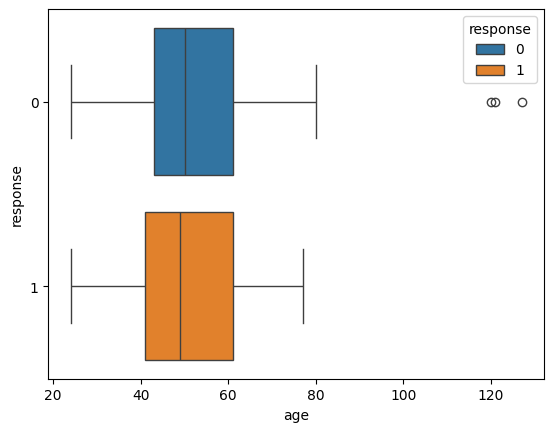

In [598]:
sns.boxplot(data=df, x='age', y='response',hue='response', orient='h')
plt.show()

In [599]:
t_test_between_groups(df, 'age')

T-statistic: -0.9810244356163194, P-value: 0.3271109227335284
The difference in age between the two classes of response is not statistically significant.


Unnecessary to bin `age` feature beforehand

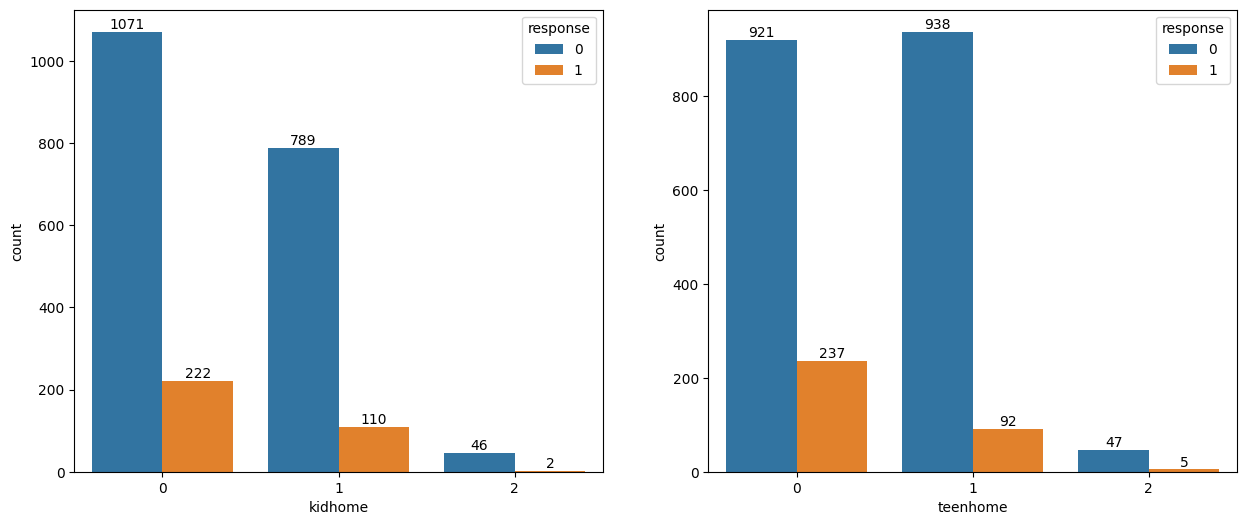

In [600]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))

sns.countplot(data=df, x='kidhome', hue='response', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)

sns.countplot(data=df, x='teenhome', hue='response', ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.show()


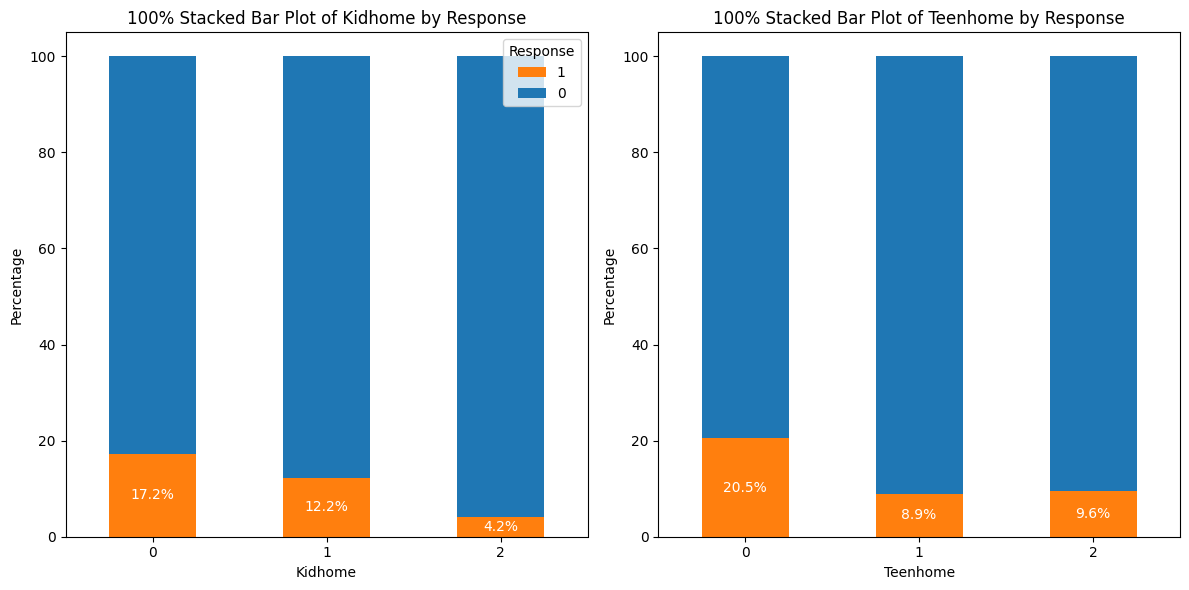

In [601]:

# Calculate percentages for 'kidhome' and 'teenhome'
df_counts_kidhome = df.groupby(['kidhome', 'response']).size().unstack(fill_value=0)[[1, 0]]
df_counts_teenhome = df.groupby(['teenhome', 'response']).size().unstack(fill_value=0)[[1, 0]]
df_percents_kidhome = df_counts_kidhome.div(df_counts_kidhome.sum(axis=1), axis=0) * 100
df_percents_teenhome = df_counts_teenhome.div(df_counts_teenhome.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_percents_kidhome.plot(kind='bar', stacked=True, ax=ax1, color=['#ff7f0e', '#1f77b4'])
df_percents_teenhome.plot(kind='bar', stacked=True, ax=ax2, color=['#ff7f0e', '#1f77b4'])

# Data labels for 'response = 1' only
for i, index in enumerate(df_percents_kidhome.index):
    percent = df_percents_kidhome.loc[index, 1]
    if percent > 0:
        ax1.text(i, percent / 2, f'{percent:.1f}%', ha='center', va='center', color='white')

for i, index in enumerate(df_percents_teenhome.index):
    percent = df_percents_teenhome.loc[index, 1]
    if percent > 0:
        ax2.text(i, percent / 2, f'{percent:.1f}%', ha='center', va='center', color='white')

# Formatting
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Kidhome')
ax1.set_title('100% Stacked Bar Plot of Kidhome by Response')
ax2.set_ylabel('Percentage')
ax2.set_xlabel('Teenhome')
ax2.set_title('100% Stacked Bar Plot of Teenhome by Response')
ax1.tick_params(axis='x', labelrotation=0)
ax2.tick_params(axis='x', labelrotation=0)
ax1.legend(title='Response')
ax2.legend().remove()
plt.tight_layout()
plt.show()


Noticeably, those without kids or teens witnessed a higher probability of accepting the offer in the last campaign. Therefore, this will be discretized into a seperate group, opposing the other "with kids"

In [602]:
df["have_kids_or_teen"] = df[["kidhome", "teenhome"]].apply(lambda x: 1 if x.sum() > 0 else 0, axis=1)
df["total_children"] = df["kidhome"] + df["teenhome"]

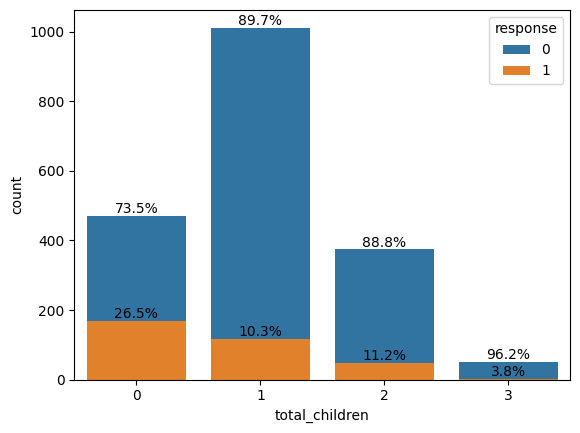

In [603]:
ax=sns.countplot(data=df, x='total_children', hue='response',dodge=False)

total_counts = df['total_children'].value_counts().sort_index()

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Retrieve the 'total_children' value for the current bar
        total_children_value = int(bar.get_x() + bar.get_width() / 2)
        total = total_counts[total_children_value]  # Get total count for this category
        if total > 0:
            percent = (height / total) * 100  # Calculate percentage
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{percent:.1f}%',
                ha='center',
                va='bottom'
            )

plt.show()

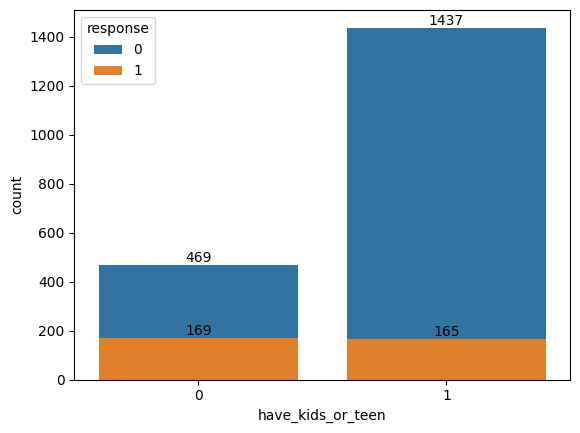

In [604]:
ax=sns.countplot(data=df, x='have_kids_or_teen',  hue='response', dodge=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
plt.show()

In [605]:
t_test_between_groups(df, 'have_kids_or_teen')

T-statistic: -8.9256473741134, P-value: 1.3521340970340653e-17
The difference in have_kids_or_teen between the two classes of response is statistically significant.


---

There is no need to have the total number of children since the have_kids_or_teen generally displays a more significant pattern

---

In [606]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response',
       'age', 'total_days_active', 'total_mnt_spent', 'total_cmp_accepted',
       'have_kids_or_teen', 'total_children'],
      dtype='object')

<Axes: xlabel='total_days_active', ylabel='response'>

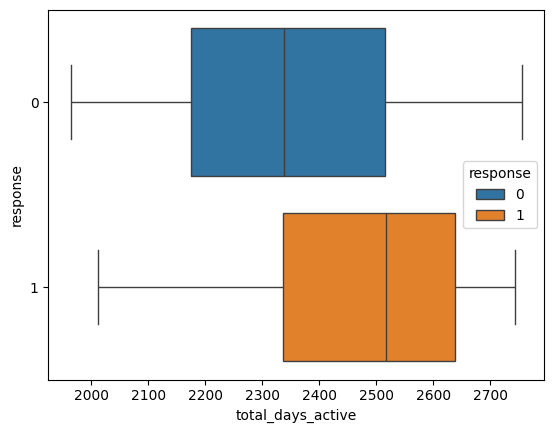

In [607]:
sns.boxplot(data=df, x='total_days_active', y='response',hue='response', orient='h')

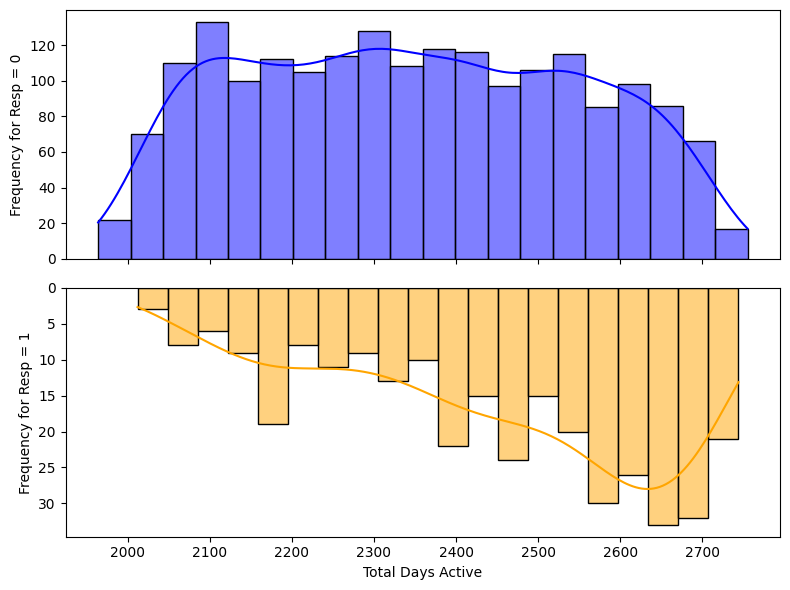

In [608]:

fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 1]})

# Plot the top histogram for response == 0
sns.histplot(data=df[df['response'] == 0], x='total_days_active', bins=20, kde=True, ax=ax_top, color='blue')
ax_top.set_ylabel('Frequency for Resp = 0')
ax_top.set_xlabel('')  # Remove x-label for top plot for clarity

# Plot the bottom histogram for response == 1 (inverted)
sns.histplot(data=df[df['response'] == 1], x='total_days_active', bins=20, kde=True, ax=ax_bottom, color='orange')
ax_bottom.invert_yaxis()  # Invert the y-axis to create a mirror effect
ax_bottom.set_ylabel('Frequency for Resp = 1')
ax_bottom.set_xlabel('Total Days Active')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [609]:
# discretize based on quartile as the higher the total active days, the more likely one is to repond positive to the campaign
df["total_days_active_bins"] = pd.qcut(df["total_days_active"], q=4,  labels=['Low', 'Below Average', 'Above Average', 'High'])

map_dict = {'Low': 0, 'Below Average': 1, 'Above Average': 2, 'High': 3}
df["total_days_active_bins"] = df["total_days_active_bins"].map(map_dict).astype(int)

In [610]:
px.histogram(df[df["income"]<200000], x='income', color='response',nbins=20)

---

We may sense a pattern of distribution within the chart where those with higher income tends to stand a higher chance/likelihood of accepting the offer.

- However, since the underlying pattern is not so obvious, we gonna defer it to IV model with quartile to see this attribute's predictive power, or probably leave it to the tree model to discretize

---

In [611]:
# two columns id, z_cost_contact, z_revenue brings minimal value to the dataset, hence, we will drop them

df.drop(["z_cost_contact","z_revenue","id"],axis=1,inplace=True)

In [612]:
df.marital_status.value_counts()

marital_status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

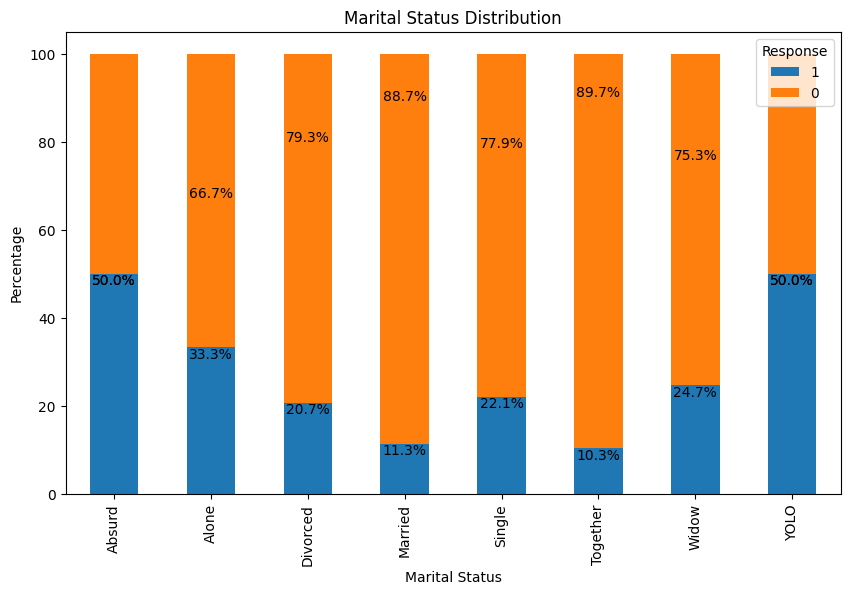

In [613]:
# Calculate the percentage
ct = pd.crosstab(df['marital_status'], df['response'], normalize='index') * 100

ct = ct[[1,0]]
# Plot the percentage
ax=ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Response')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 50:
            va = 'bottom'
        else:
            va = 'top'
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va=va
        )
plt.show()

In [614]:
alone_col = ['Alone', 'YOLO', 'Absurd', 'Single']
married_col = ['Married', 'Together']
used_to_marry = ['Divorced', 'Widow']

df['marital_status'] = df['marital_status'].map(
    lambda x: 'Alone' if x in alone_col else
              'Married' if x in married_col else
              'Used_to_marry' if x in used_to_marry else x
)

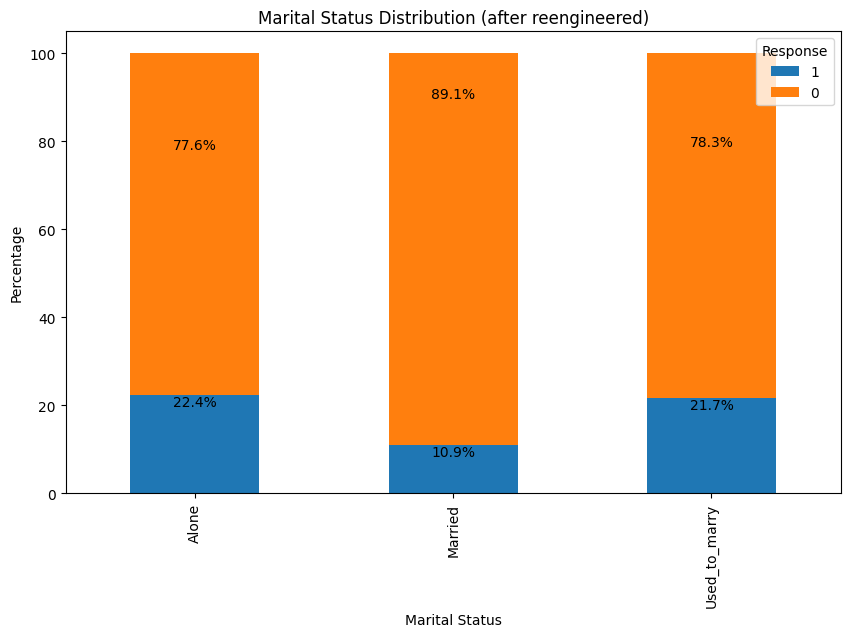

In [615]:
# Calculate the percentage
ct = pd.crosstab(df['marital_status'], df['response'], normalize='index') * 100

ct = ct[[1,0]]
# Plot the percentage
ax=ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Marital Status Distribution (after reengineered)')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Response')

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 50:
            va = 'bottom'
        else:
            va = 'top'
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va=va
        )
plt.show()

Those that are currently with their spouse have double likelihood of accepting offer

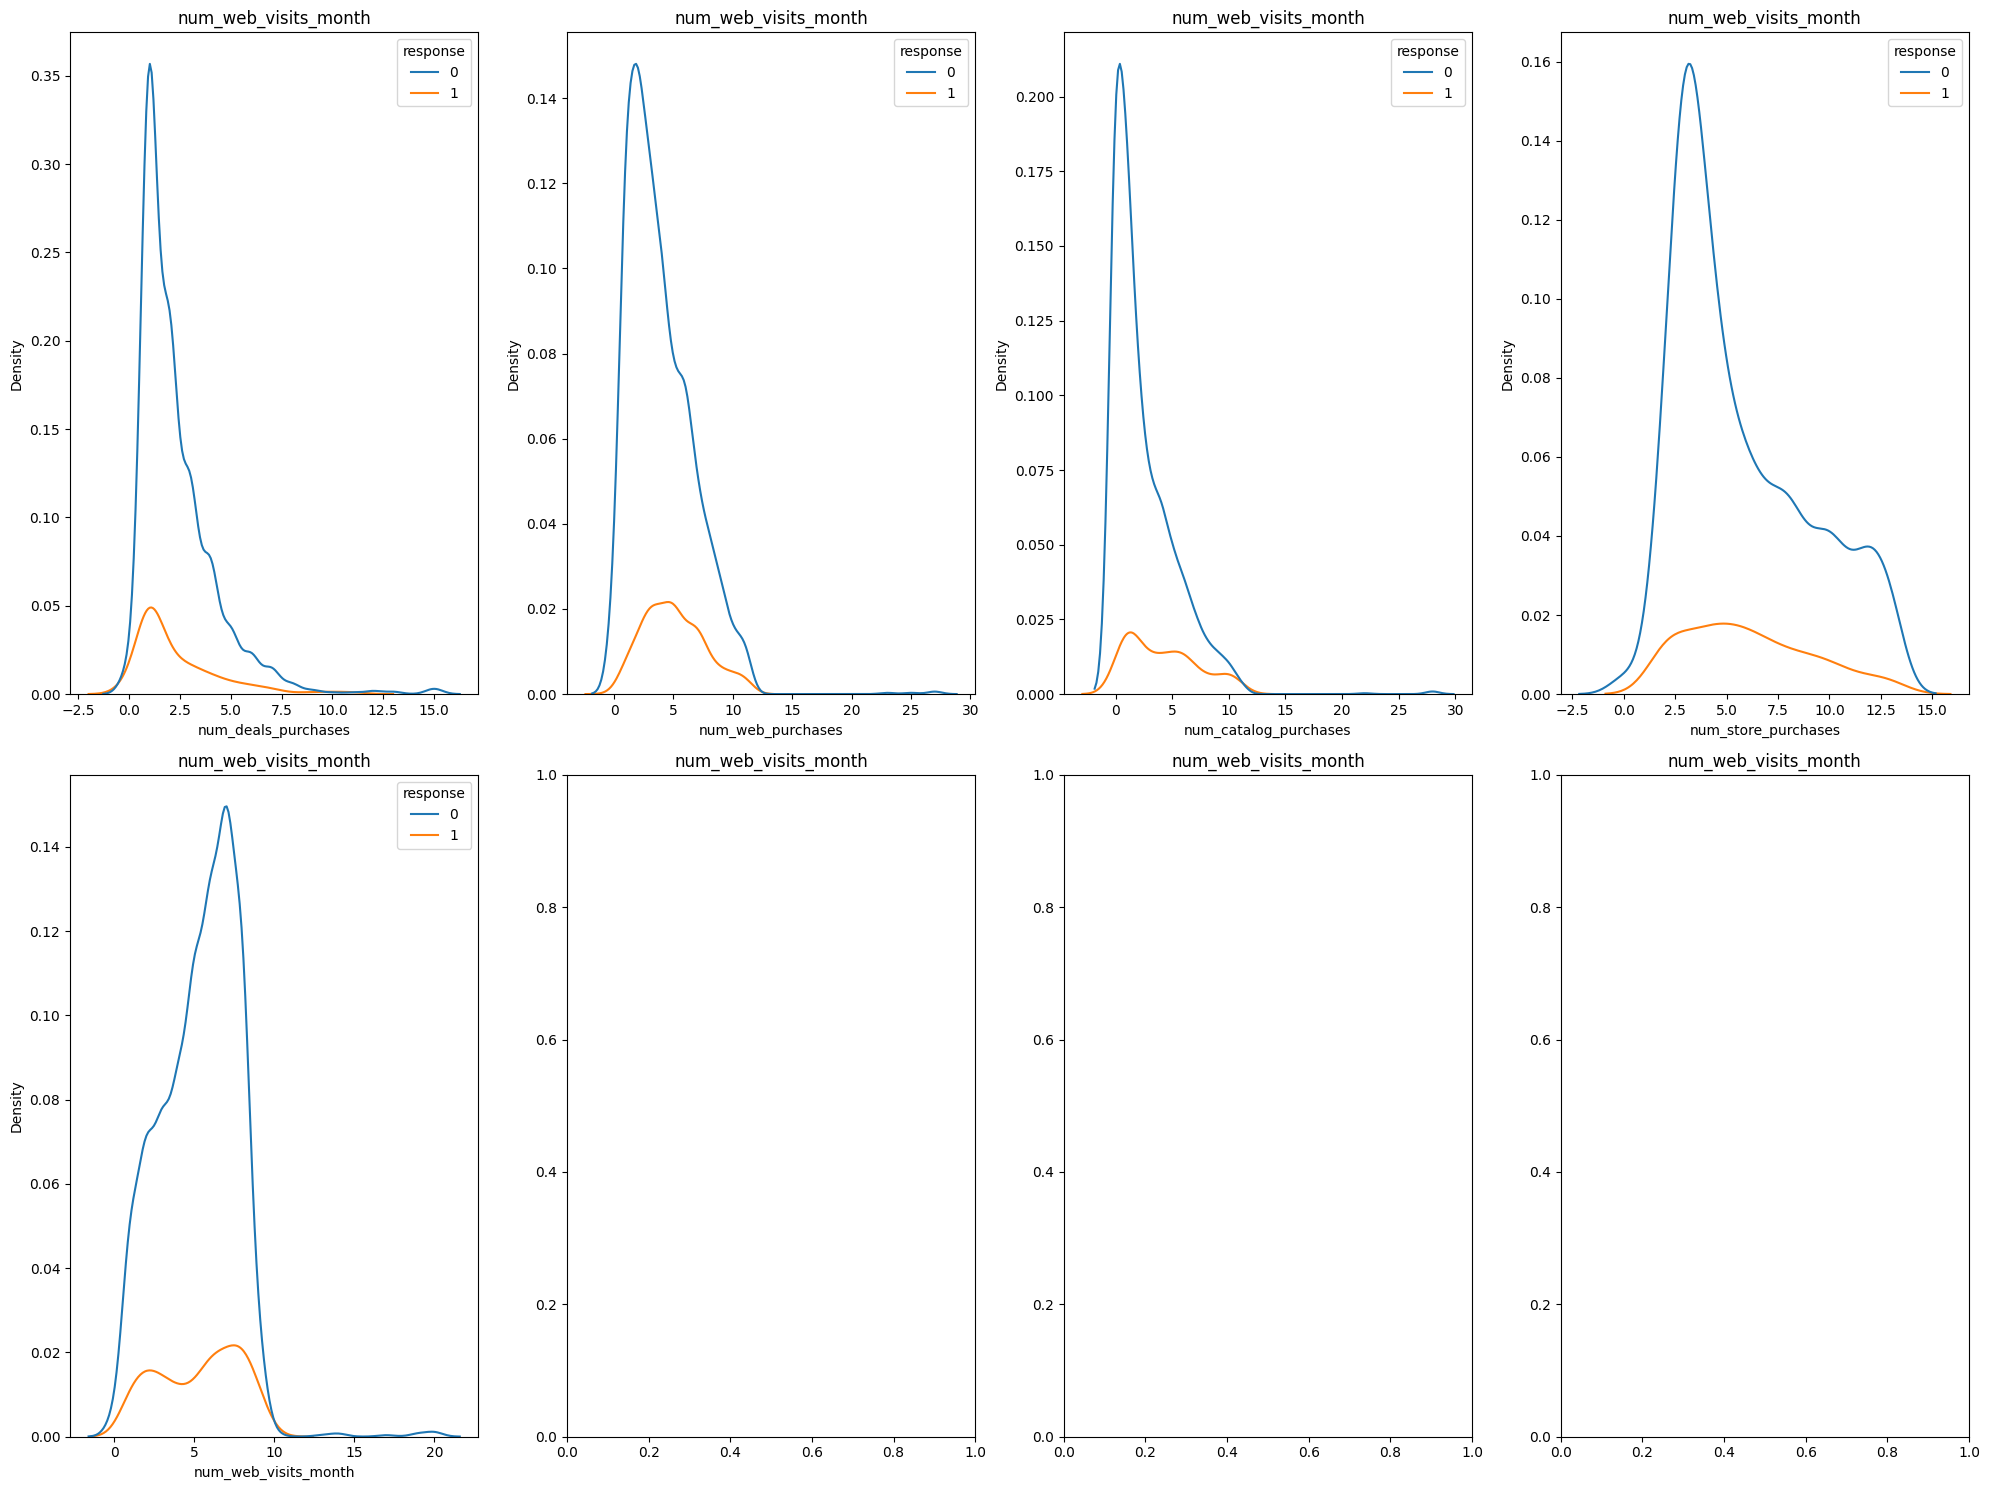

In [616]:
cols_freq = df.columns[df.columns.str.contains('num')]

fig, axes = plt.subplots(nrows=len(cols_freq)//3+1, ncols=4, figsize=(20, 15))

for i, col in enumerate(cols_freq):
    sns.kdeplot(data=df, x=col, hue='response', ax=axes[i // 4, i % 4])

for ax in axes.flat:
    ax.set_title(cols_freq[i])

plt.tight_layout()
plt.show()

<Axes: xlabel='total_mnt_spent', ylabel='Count'>

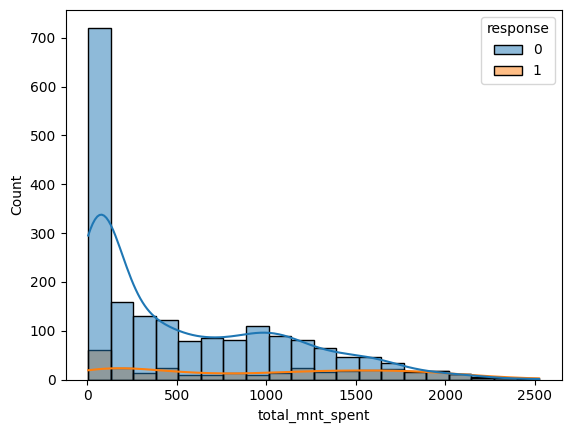

In [617]:
sns.histplot(data=df, x='total_mnt_spent', hue='response', bins=20, kde=True)

<Axes: xlabel='total_mnt_spent', ylabel='Count'>

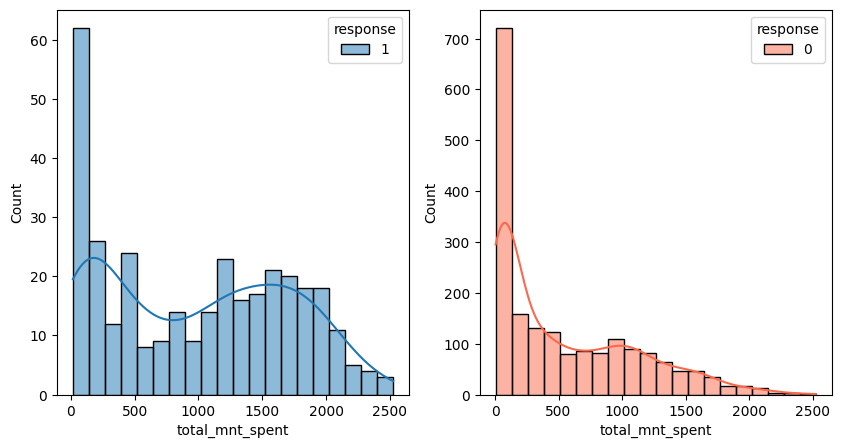

In [618]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df[df["response"]==1], x='total_mnt_spent', hue='response', bins=20, kde=True, ax=ax[0])
sns.histplot(data=df[df["response"]==0], x='total_mnt_spent', palette='Reds', hue='response', bins=20, kde=True, ax=ax[1])

In [619]:
# higher amount spent, higher chance of responding to the campaign, preliminarily we will discretize based on 4 quartiles
df["total_mnt_spent_bins"] = pd.qcut(df["total_mnt_spent"], q=4,  labels=['Low', 'Below Average', 'Above Average', 'High'])

map_dict = {'Low': 0, 'Below Average': 1, 'Above Average': 2, 'High': 3}
df["total_mnt_spent_bins"] = df["total_mnt_spent_bins"].map(map_dict).astype(int)

# 4. Feature Selection

## 4.1 Comprehensive Review of Attributes

Since we have actually generated quite a few new features along the way, let's take a look at all of them together

In [620]:
print("All features/attributes to date:","; ".join(df.columns.values))
print("\n")

pd.set_option("display.max_columns",None)
df.head()

All features/attributes to date: year_birth; education; marital_status; income; kidhome; teenhome; dt_customer; recency; mnt_wines; mnt_fruits; mnt_meat_products; mnt_fish_products; mnt_sweet_products; mnt_gold_prods; num_deals_purchases; num_web_purchases; num_catalog_purchases; num_store_purchases; num_web_visits_month; accepted_cmp3; accepted_cmp4; accepted_cmp5; accepted_cmp1; accepted_cmp2; complain; response; age; total_days_active; total_mnt_spent; total_cmp_accepted; have_kids_or_teen; total_children; total_days_active_bins; total_mnt_spent_bins




year_birth  education marital_status   income  kidhome  teenhome  \
0        1957          2          Alone  58138.0        0         0   
1        1954          2          Alone  46344.0        1         1   
2        1965          2        Married  71613.0        0         0   
3        1984          2        Married  26646.0        1         0   
4        1981          5        Married  58293.0        1         0   

  dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0  2012-09-04       58        635          88                546   
1  2014-03-08       38         11           1                  6   
2  2013-08-21       26        426          49                127   
3  2014-02-10       26         11           4                 20   
4  2014-01-19       94        173          43                118   

   mnt_fish_products  mnt_sweet_products  mnt_gold_prods  num_deals_purchases  \
0                172                  88              88                    3   
1                  2                   1               6                    2   
2                111                  21              42                    1   
3                 10                   3               5                    2   
4                 46                  27              15                    5   

   num_web_purchases  num_catalog_purchases  num_store_purchases  \
0                  8                     10                    4   
1                  1                      1                    2   
2                  8                      2                   10   
3                  2                      0                    4   
4                  5                      3                    6   

   num_web_visits_month  accepted_cmp3  accepted_cmp4  accepted_cmp5  \
0                     7              0              0              0   
1                     5              0              0              0   
2                     4              0              0              0   
3                     6              0              0              0   
4                     5              0              0              0   

   accepted_cmp1  accepted_cmp2  complain  response  age  total_days_active  \
0              0              0         0         1   63               2666   
1              0              0         0         0   66               2136   
2              0              0         0         0   55               2347   
3              0              0         0         0   36               2174   
4              0              0         0         0   39               2128   

   total_mnt_spent  total_cmp_accepted  have_kids_or_teen  total_children  \
0             1617                   0                  0               0   
1               27                   0                  1               2   
2              776                   0                  0               0   
3               53                   0                  1               1   
4              422                   0                  1               1   

   total_days_active_bins  total_mnt_spent_bins  
0                       3                     3  
1                       0                     0  
2                       1                     2  
3                       0                     0  
4                       0                     2

In [621]:
# So, all the new attributes to date are:

print(f"New attributes to-date: {'; '.join(df.columns[-7:].values)}")

New attributes to-date: total_days_active; total_mnt_spent; total_cmp_accepted; have_kids_or_teen; total_children; total_days_active_bins; total_mnt_spent_bins


## 4.2 Remove Redundant Features

In [622]:
df.drop(["year_birth","dt_customer"],axis=1,inplace=True)

## 4.3 Feature Normalization

<h3 style="color:pink;font-size:20px"> Since I am intent on utilizing Boosting Models - Decision Tree Based, specifically XGBoost or LightGBM, rescaling is not by far necessary since such algorithms are invariant to monotonic transformations of the features </h3>

In [623]:
# PLACEHOLDER IF NEEDED IN THE FUTURE

## 4.4 One-Hot Encoding Categorical Attributes

In [624]:
check_data(df)

dtype valid_instances unique total_null null_pct  \
education                 int64            2240      5          0      0.0   
marital_status           object            2240      3          0      0.0   
income                  float64            2216   1974         24     1.08   
kidhome                   int64            2240      3          0      0.0   
teenhome                  int64            2240      3          0      0.0   
recency                   int64            2240    100          0      0.0   
mnt_wines                 int64            2240    776          0      0.0   
mnt_fruits                int64            2240    158          0      0.0   
mnt_meat_products         int64            2240    558          0      0.0   
mnt_fish_products         int64            2240    182          0      0.0   
mnt_sweet_products        int64            2240    177          0      0.0   
mnt_gold_prods            int64            2240    213          0      0.0   
num_deals_purchases       int64            2240     15          0      0.0   
num_web_purchases         int64            2240     15          0      0.0   
num_catalog_purchases     int64            2240     14          0      0.0   
num_store_purchases       int64            2240     14          0      0.0   
num_web_visits_month      int64            2240     16          0      0.0   
accepted_cmp3             int64            2240      2          0      0.0   
accepted_cmp4             int64            2240      2          0      0.0   
accepted_cmp5             int64            2240      2          0      0.0   
accepted_cmp1             int64            2240      2          0      0.0   
accepted_cmp2             int64            2240      2          0      0.0   
complain                  int64            2240      2          0      0.0   
response                  int64            2240      2          0      0.0   
age                       int64            2240     59          0      0.0   
total_days_active         int64            2240    704          0      0.0   
total_mnt_spent           int64            2240   1054          0      0.0   
total_cmp_accepted        int64            2240      5          0      0.0   
have_kids_or_teen         int64            2240      2          0      0.0   
total_children            int64            2240      4          0      0.0   
total_days_active_bins    int32            2240      4          0      0.0   
total_mnt_spent_bins      int32            2240      4          0      0.0   

                       duplicates  
education                    2235  
marital_status               2237  
income                        265  
kidhome                      2237  
teenhome                     2237  
recency                      2140  
mnt_wines                    1464  
mnt_fruits                   2082  
mnt_meat_products            1682  
mnt_fish_products            2058  
mnt_sweet_products           2063  
mnt_gold_prods               2027  
num_deals_purchases          2225  
num_web_purchases            2225  
num_catalog_purchases        2226  
num_store_purchases          2226  
num_web_visits_month         2224  
accepted_cmp3                2238  
accepted_cmp4                2238  
accepted_cmp5                2238  
accepted_cmp1                2238  
accepted_cmp2                2238  
complain                     2238  
response                     2238  
age                          2181  
total_days_active            1536  
total_mnt_spent              1186  
total_cmp_accepted           2235  
have_kids_or_teen            2238  
total_children               2236  
total_days_active_bins       2236  
total_mnt_spent_bins         2236

In [625]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

cols_encode = ['marital_status']
df_encoded = encoder.fit_transform(df[cols_encode])

df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cols_encode))

df_final = pd.concat([df, df_encoded], axis=1)

df_final.drop(cols_encode, axis=1, inplace=True)

df_final.head()

education   income  kidhome  teenhome  recency  mnt_wines  mnt_fruits  \
0          2  58138.0        0         0       58        635          88   
1          2  46344.0        1         1       38         11           1   
2          2  71613.0        0         0       26        426          49   
3          2  26646.0        1         0       26         11           4   
4          5  58293.0        1         0       94        173          43   

   mnt_meat_products  mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                546                172                  88              88   
1                  6                  2                   1               6   
2                127                111                  21              42   
3                 20                 10                   3               5   
4                118                 46                  27              15   

   num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                    3                  8                     10   
1                    2                  1                      1   
2                    1                  8                      2   
3                    2                  2                      0   
4                    5                  5                      3   

   num_store_purchases  num_web_visits_month  accepted_cmp3  accepted_cmp4  \
0                    4                     7              0              0   
1                    2                     5              0              0   
2                   10                     4              0              0   
3                    4                     6              0              0   
4                    6                     5              0              0   

   accepted_cmp5  accepted_cmp1  accepted_cmp2  complain  response  age  \
0              0              0              0         0         1   63   
1              0              0              0         0         0   66   
2              0              0              0         0         0   55   
3              0              0              0         0         0   36   
4              0              0              0         0         0   39   

   total_days_active  total_mnt_spent  total_cmp_accepted  have_kids_or_teen  \
0               2666             1617                   0                  0   
1               2136               27                   0                  1   
2               2347              776                   0                  0   
3               2174               53                   0                  1   
4               2128              422                   0                  1   

   total_children  total_days_active_bins  total_mnt_spent_bins  \
0               0                       3                     3   
1               2                       0                     0   
2               0                       1                     2   
3               1                       0                     0   
4               1                       0                     2   

   marital_status_Married  marital_status_Used_to_marry  
0                     0.0                           0.0  
1                     0.0                           0.0  
2                     1.0                           0.0  
3                     1.0                           0.0  
4                     1.0                           0.0

## 4.5 Feature Evaluation & Selection

### 4.5.1 Correlation Matrix

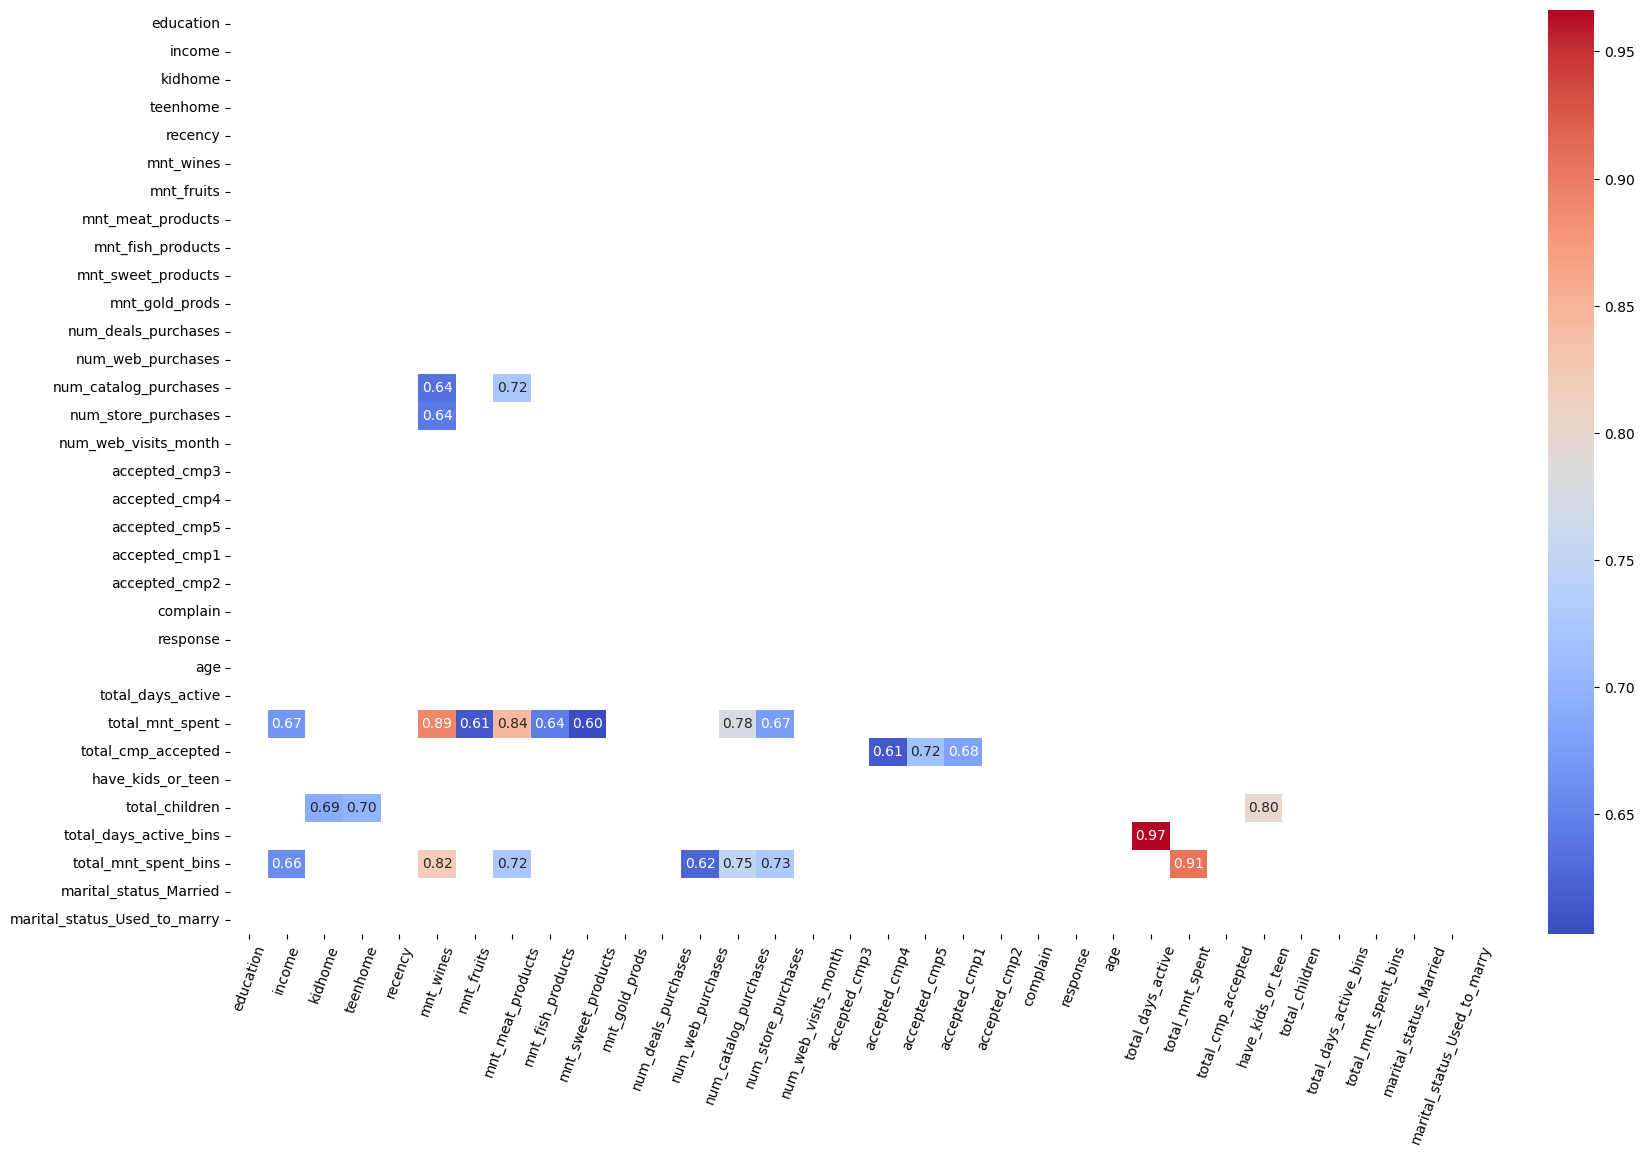

In [626]:
# plot correlation heatmap for numerical variables
mask = np.triu(np.ones_like(df_final.select_dtypes('number').corr(), dtype=bool))

# display only values > 0.6

plt.figure(figsize=(20, 12))
sns.heatmap(df_final.select_dtypes('number').corr()[df.select_dtypes('number').corr()>0.6], annot=True, fmt='.2f', mask=mask, cmap = 'coolwarm')
plt.xticks(rotation=70)
plt.show()

### 4.5.2 Information Value Model

In [627]:
def calculate_woe_iv(df, feature, target, var_name=None):
    """
    Calculates WoE, IV values for a given feature and target variable
    """
    lst = []

    # Calculate the number of events and non-events
    total_events = df[target].sum()
    total_non_events = df[target].count() - total_events

    # Group by the feature and calculate event and non-event counts
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped.columns = ['total', 'events']
    grouped['non_events'] = grouped['total'] - grouped['events']

    # Calculate the distribution of events and non-events
    grouped['dist_events'] = grouped['events'] / total_events
    grouped['dist_non_events'] = grouped['non_events'] / total_non_events

    # Replace 0 values to avoid division by zero and log of zero
    grouped.replace({'dist_events': {0: 0.0001}, 'dist_non_events': {0: 0.0001}}, inplace=True)

    # Calculate WoE and IV
    grouped['WoE'] = np.log(grouped['dist_events'] / grouped['dist_non_events'])
    grouped['IV'] = (grouped['dist_events'] - grouped['dist_non_events']) * grouped['WoE']

    # Sum IV for the feature
    iv = grouped['IV'].sum()

    # Store the result with the correct variable name
    if var_name is None:
        var_name = feature
    lst.append({
        'Variable': var_name,
        'IV': iv
    })

    df_woe_iv = pd.DataFrame(lst)
    return df_woe_iv, grouped[['WoE']]


In [628]:
df_final_iv = df_final.copy()

In [629]:
def return_iv(df, target = 'response', var_name=None):
    # Initialize iv_df
    iv_df = pd.DataFrame(columns=['Variable', 'IV'])

    features = df.columns.drop(target)

    for feature in features:
        # Skip the target variable
        if feature == target:
            continue

        # Determine if the feature is numerical
        if pd.api.types.is_numeric_dtype(df[feature]):
            # Bin numerical features
            if df[feature].nunique() > 10 and df[feature].dtype != 'bool':
                # Create a unique temporary bin column
                temp_bin_col = f'temp_bin_{feature}'
                df[temp_bin_col] = pd.qcut(df[feature], 10, duplicates='drop')
                feature_to_use = temp_bin_col
            else:
                feature_to_use = feature

            # Calculate WoE and IV, pass the original feature name
            iv, woe = calculate_woe_iv(df, feature_to_use, target, var_name=feature)
            iv_df = pd.concat([iv_df, iv], ignore_index=True)

            # Drop the temporary bin column if created
            if feature_to_use != feature:
                df.drop(columns=[feature_to_use], inplace=True)
        else:
            # For categorical variables
            iv, woe = calculate_woe_iv(df, feature, target)
            iv_df = pd.concat([iv_df, iv], ignore_index=True)


    iv_df.sort_values('IV', ascending=False, inplace=True)
    return iv_df

return_iv(df_final_iv)


Variable        IV
25            total_cmp_accepted  1.069102
24               total_mnt_spent  0.645576
7              mnt_meat_products  0.587571
18                 accepted_cmp5  0.544276
29          total_mnt_spent_bins  0.496176
5                      mnt_wines  0.483095
23             total_days_active  0.462772
10                mnt_gold_prods  0.448182
19                 accepted_cmp1  0.439637
28        total_days_active_bins  0.365807
13         num_catalog_purchases  0.357837
1                         income  0.357560
4                        recency  0.350256
12             num_web_purchases  0.347206
16                 accepted_cmp3  0.342463
27                total_children  0.314885
26             have_kids_or_teen  0.297264
14           num_store_purchases  0.232975
9             mnt_sweet_products  0.232895
6                     mnt_fruits  0.217650
3                       teenhome  0.217560
17                 accepted_cmp4  0.177987
30        marital_status_Married  0.168880
8              mnt_fish_products  0.154146
20                 accepted_cmp2  0.136106
15          num_web_visits_month  0.129615
0                      education  0.090297
11           num_deals_purchases  0.075562
2                        kidhome  0.061901
22                           age  0.051926
31  marital_status_Used_to_marry  0.040165
21                      complain  0.000023

#### IV Score Evaluation Reference

<center>
<img src='IV_score_reference.jpg' width=600>
</center>

---
Inference from IV score Model & Correlational Matrix:
- `complain` has a significanly low IV score, therefore, we can neglect this attribute
- Besides, `kidhome` and `teenhome` can be excluded from the model to avoid multicolinearity. The same idea also holds true with `total_children`, availing ourselves of only `have_kids_or_teen` is already comparable
- With the case of `total_mnt_spent`, current method of discretization is not optimal since its relation with the target var is not completely linear, therefore we will drop its discretized version (`total_mnt_spent_bins`) and instead, leave the original attribute to the model to decide (in case of trees model), otherwise, increase the number of bins.
- The same is true for `total_days_active` and its binned attribute
---

In [630]:
df_final.drop(columns=['complain','kidhome','teenhome','total_children'], inplace=True)

# increase bins for amout spent for total_mnt_spent
df_final['total_mnt_spent_bins'] = pd.qcut(df_final['total_mnt_spent'], 10, duplicates='drop')
df_final["total_mnt_spent_bins"] = df_final["total_mnt_spent_bins"].cat.codes

In [631]:
df_final.columns

Index(['education', 'income', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'age', 'total_days_active',
       'total_mnt_spent', 'total_cmp_accepted', 'have_kids_or_teen',
       'total_days_active_bins', 'total_mnt_spent_bins',
       'marital_status_Married', 'marital_status_Used_to_marry'],
      dtype='object')

## 4.6 Dealing with Missing Data

In [632]:
df_final.isnull().sum()

education                        0
income                          24
recency                          0
mnt_wines                        0
mnt_fruits                       0
mnt_meat_products                0
mnt_fish_products                0
mnt_sweet_products               0
mnt_gold_prods                   0
num_deals_purchases              0
num_web_purchases                0
num_catalog_purchases            0
num_store_purchases              0
num_web_visits_month             0
accepted_cmp3                    0
accepted_cmp4                    0
accepted_cmp5                    0
accepted_cmp1                    0
accepted_cmp2                    0
response                         0
age                              0
total_days_active                0
total_mnt_spent                  0
total_cmp_accepted               0
have_kids_or_teen                0
total_days_active_bins           0
total_mnt_spent_bins             0
marital_status_Married           0
marital_status_Used_

In [633]:
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

missing_mask = df_final['income'].isnull()

train_data_mv = df_final[~missing_mask]
test_data_mv = df_final[missing_mask]

X_train_mv = train_data_mv.drop(columns=['income'])
y_train_mv = train_data_mv['income']

X_predict_mv = test_data_mv.drop(columns=['income'])

X_train_mv, X_val_mv, y_train_mv, y_val_mv = train_test_split(X_train_mv, y_train_mv, test_size=0.2, random_state=42)

clf = LGBMRegressor()

clf.fit(
    X_train_mv, y_train_mv,
    eval_set=[(X_val_mv, y_val_mv)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=10)]
)

y_train_pred = clf.predict(X_train_mv)
rmse = np.sqrt(mean_squared_error(y_train_mv, y_train_pred))
r2 = r2_score(y_train_mv, y_train_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1800
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 28
[LightGBM] [Info] Start training from score 52312.949774
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[52]	valid_0's rmse: 9490.66	valid_0's l2: 9.00726e+07
Root Mean Squared Error: 13643.049344097215
R2 Score: 0.7215512846402143


In [634]:
df_final.loc[missing_mask, 'income'] = clf.predict(X_predict_mv)

df_final.loc[missing_mask, :]

education        income  recency  mnt_wines  mnt_fruits  \
10            2  30994.619132       11          5           5   
27            2  83612.269063       19          5           1   
43            5  46893.786291       80         81          11   
48            2  43041.142718       96         48           5   
58            2  26852.415900       57         11           3   
71            3  31708.311124       25         25           3   
90            5  45713.037599        4        230          42   
91            2  32993.534367       45          7           0   
92            4  74319.477080       87        445          37   
128           5  56918.615556       23        352           0   
133           2  67245.428395       96        231          65   
312           2  76133.848098       69        861         138   
319           2  63063.912010       67        738          20   
1379          4  52513.510793       39        187           5   
1382          2  37432.545167       87         19           4   
1383          3  34585.661623       49          5           1   
1386          5  38191.122449       17         25           1   
2059          4  59435.628334       52        375          42   
2061          5  44638.252783       82         23           0   
2078          2  33828.096959       82         71           1   
2079          4  49150.900112       83        161           0   
2081          2  46980.638262       95        264           0   
2084          4  84083.935854       75        532         126   
2228          3  97579.599661       53         32           2   

      mnt_meat_products  mnt_fish_products  mnt_sweet_products  \
10                    6                  0                   2   
27                    3                  3                 263   
43                   50                  3                   2   
48                   48                  6                  10   
58                   22                  2                   2   
71                   43                 17                   4   
90                  192                 49                  37   
91                    8                  2                   0   
92                  359                 98                  28   
128                  27                 10                   0   
133                 196                 38                  71   
312                 461                 60                  30   
319                 172                 52                  50   
1379                 65                 26                  20   
1382                 12                  2                   2   
1383                  9                  2                   0   
1386                 13                  0                   0   
2059                 48                 94                  66   
2061                 15                  0                   2   
2078                 16                  0                   0   
2079                 22                  0                   0   
2081                 21                 12                   6   
2084                490                164                 126   
2228               1607                 12                   4   

      mnt_gold_prods  num_deals_purchases  num_web_purchases  \
10                 1                    1                  1   
27               362                    0                 27   
43                39                    1                  1   
48                 7                    3                  2   
58                 6                    2                  2   
71                17                    3                  3   
90                53                   12                  7   
91                 1                    1                  1   
92                18                    1                  2   
128               15                    3                  6   
133              124     

In [635]:
check_data(df_final)

dtype valid_instances unique total_null  \
education                       int64            2240      5          0   
income                        float64            2240   1998          0   
recency                         int64            2240    100          0   
mnt_wines                       int64            2240    776          0   
mnt_fruits                      int64            2240    158          0   
mnt_meat_products               int64            2240    558          0   
mnt_fish_products               int64            2240    182          0   
mnt_sweet_products              int64            2240    177          0   
mnt_gold_prods                  int64            2240    213          0   
num_deals_purchases             int64            2240     15          0   
num_web_purchases               int64            2240     15          0   
num_catalog_purchases           int64            2240     14          0   
num_store_purchases             int64            2240     14          0   
num_web_visits_month            int64            2240     16          0   
accepted_cmp3                   int64            2240      2          0   
accepted_cmp4                   int64            2240      2          0   
accepted_cmp5                   int64            2240      2          0   
accepted_cmp1                   int64            2240      2          0   
accepted_cmp2                   int64            2240      2          0   
response                        int64            2240      2          0   
age                             int64            2240     59          0   
total_days_active               int64            2240    704          0   
total_mnt_spent                 int64            2240   1054          0   
total_cmp_accepted              int64            2240      5          0   
have_kids_or_teen               int64            2240      2          0   
total_days_active_bins          int32            2240      4          0   
total_mnt_spent_bins             int8            2240     10          0   
marital_status_Married        float64            2240      2          0   
marital_status_Used_to_marry  float64            2240      2          0   

                             null_pct duplicates  
education                         0.0       2235  
income                            0.0        242  
recency                           0.0       2140  
mnt_wines                         0.0       1464  
mnt_fruits                        0.0       2082  
mnt_meat_products                 0.0       1682  
mnt_fish_products                 0.0       2058  
mnt_sweet_products                0.0       2063  
mnt_gold_prods                    0.0       2027  
num_deals_purchases               0.0       2225  
num_web_purchases                 0.0       2225  
num_catalog_purchases             0.0       2226  
num_store_purchases               0.0       2226  
num_web_visits_month              0.0       2224  
accepted_cmp3                     0.0       2238  
accepted_cmp4                     0.0       2238  
accepted_cmp5                     0.0       2238  
accepted_cmp1                     0.0       2238  
accepted_cmp2                     0.0       2238  
response                          0.0       2238  
age                               0.0       2181  
total_days_active                 0.0       1536  
total_mnt_spent                   0.0       1186  
total_cmp_accepted                0.0       2235  
have_kids_or_teen                 0.0       2238  
total_days_active_bins            0.0       2236  
total_mnt_spent_bins              0.0       2230  
marital_status_Married            0.0       2238  
marital_status_Used_to_marry      0.0       2238

<Axes: xlabel='income', ylabel='Count'>

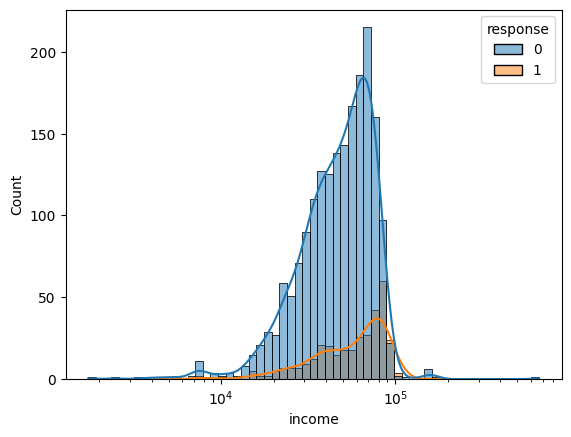

In [636]:
sns.histplot(data=df_final, x='income', hue='response', kde=True, log_scale=True)

In [637]:
# export preprocessed data `ifood_preprocessed_final.csv`
df_final.to_csv('ifood_preprocessed_final.csv', index=False)

# 5. Model Construction (Đức Minh) - LightGBM vs. XGBoost

## 5.1 Reasons for Shortlisting LightGBM & XGBoost

In [638]:
class_pct = df_final["response"].value_counts()

# plot pie chart

fig=px.pie(names=class_pct.index, values=class_pct.values, hole=0.3, color_discrete_sequence=['pink', 'green'],
           width=800, height=500)

fig.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)

**<h4 style="color:pink;font-size:30">Reasons for Shortlisting LightGBM & XGBoost:</h4>**

1. **Scalability and Robustness for Large Datasets:** As the customer base in the telecommunications industry grows, datasets may scale from medium to large. LightGBM are robust algorithms designed to handle large-scale data efficiently, making them suitable for this context. Also, LGBM are efficient in handling high-dimensional datasets

2. **Effective Handling of Class Imbalance:** The target variable `response` exhibits significant class imbalance. This model offers parameters like `scale_pos_weight` and `is_unbalance` or `scale_pos_weight` (LightGBM) to address this issue, minimizing bias toward the majority class.

3. **Prevention of Overfitting through Regularization:** Built-in regularization techniques in the model help prevent overfitting, enhancing the model's ability to generalize to new data.

4. **Capturing Complex Nonlinear Relationships:** As powerful gradient boosting algorithms, they excel at modeling complex nonlinear patterns in data, often outperforming other classification methods.

5. **Efficient Training with Parallel and Distributed Computing:** Support for parallel computing and distributed training accelerates the training process, making them efficient for large datasets.

6. **Insightful Feature Importance Scores:** This model provide feature importance metrics, helping identify the most influential factors contributing to response acceptance rate/propensity, which is valuable for strategic decision-making.

<a style="color:pink"> Although there is an obvious class imbalance, resampling approach (such as SMOTE upsampling for the minority) is not necessary because LightGBM have built-in parameters to deal with it (`scale_pos_weight`) </a>

## 5.2 Train, Holdout Dataset Load

In [639]:
X = df_final.drop(columns=['response','total_mnt_spent_bins','total_days_active_bins'])
y = df_final['response']

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [640]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\ACER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 5.3 Models Fitting with BayesSearchCV

In [641]:
# import model libraries
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

In [642]:
# Calculate scale_pos_weight to handle class imbalance
negative_count_final = np.sum(y_train_final == 0)
positive_count_final = np.sum(y_train_final == 1)
scale_pos_weight_final = negative_count_final / positive_count_final

# Define parameter space for BayesSearchCV (adjusted for XGBoost)
param_space_xgb_final = {
    'n_estimators': (100, 200),
    'max_depth': (3, 7),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'subsample': (0.8, 1),
    'colsample_bytree': (0.8, 1),
    'scale_pos_weight': (scale_pos_weight_final,),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    'min_child_weight': (1, 5)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up BayesSearchCV
bayes_search_xgb_final = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space_xgb_final,
    scoring='roc_auc', # set roc_auc for similar objectives as above
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
bayes_search_xgb_final.fit(X_train_final, y_train_final)

# Get the best estimator
best_xgb_final = bayes_search_xgb_final.best_estimator_

# Evaluate XGBoost on test set
y_pred_xgb_final = best_xgb_final.predict(X_test_final)
y_pred_proba_xgb_final = best_xgb_final.predict_proba(X_test_final)[:, 1]

accuracy_xgb_final = accuracy_score(y_test_final, y_pred_xgb_final)
roc_auc_xgb_final = roc_auc_score(y_test_final, y_pred_proba_xgb_final)
f1_score_xgb_final = f1_score(y_test_final, y_pred_xgb_final)

xgboost_performance_final = pd.DataFrame({
    'Model': ['XGBoost'],
    'Accuracy': [accuracy_xgb_final],
    'ROC AUC': [roc_auc_xgb_final],
    'f1_score': [f1_score_xgb_final]
})

print(xgboost_performance_final)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [643]:
# import model libraries
from lightgbm import LGBMClassifier


# Define parameter space for BayesSearchCV
param_space_lgbm_final = {
    'n_estimators': (100, 200),
    'max_depth': (3, 7),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'subsample': (0.8, 1),
    'colsample_bytree': (0.8, 1),
    'scale_pos_weight': (scale_pos_weight_final,),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    'min_child_weight': (1, 5)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgbm_model = LGBMClassifier(random_state=42)

# Set up BayesSearchCV
bayes_search_lgbm_final = BayesSearchCV(
    estimator=lgbm_model,
    search_spaces=param_space_lgbm_final,
    scoring='roc_auc', # set roc_auc since its important not to miss out most potential TA groups but at the same time, strike the balance with targetting wrong users to avoid overbudgetting (in a imbalanced dataset)
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
bayes_search_lgbm_final.fit(X_train_final, y_train_final)

# Get the best estimator
best_lgbm_final = bayes_search_lgbm_final.best_estimator_

# Evaluate LightGBM on test set
y_pred_lgbm_final = best_lgbm_final.predict(X_test_final)
y_pred_proba_lgbm_final = best_lgbm_final.predict_proba(X_test_final)[:, 1]

accuracy_lgbm_final = accuracy_score(y_test_final, y_pred_lgbm_final)
roc_auc_lgbm_final = roc_auc_score(y_test_final, y_pred_proba_lgbm_final)
f1_score_lgbm_final = f1_score(y_test_final, y_pred_lgbm_final)

lgbm_performance_final = pd.DataFrame({
    'Model': ['LightGBM'],
    'Accuracy': [accuracy_lgbm_final],
    'ROC AUC': [roc_auc_lgbm_final],
    'f1_score': [f1_score_lgbm_final]
})

print(lgbm_performance_final)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## 5.4 Models Comparison - XGBoost Chosen

In [644]:
model_comparison_final = pd.concat([xgboost_performance_final, lgbm_performance_final], ignore_index=True)


fig = px.scatter(model_comparison_final, x='Model', y=['Accuracy', 'ROC AUC', 'f1_score'], title='Model Comparison',
                 width=800, height=500)
fig.show()

In [645]:
best_xgb_final

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03716635429098037, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

---

Among the two models, XGBoost seems to perform a little better as compared to LGBM. This might be attributed to its suitablity for smaller dataset as ours without overfitting

---

## 5.5 Testing SMOTE Upsampling vs. Built-in `scale_pos_weight` Hyperparameter

In [646]:
# use SMOTE Upsampling to tackle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train_final, y_train_final)

In [647]:
# Define parameter space for BayesSearchCV (adjusted for XGBoost)
param_space_xgb_final_sm = {
    'n_estimators': (100, 200),
    'max_depth': (3, 7),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'subsample': (0.8, 1),
    'colsample_bytree': (0.8, 1),
    'reg_alpha': (0, 1),
    'reg_lambda': (0, 1),
    'min_child_weight': (1, 5)
}

cv_sm = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_model_sm = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up BayesSearchCV
bayes_search_xgb_final_sm = BayesSearchCV(
    estimator=xgb_model_sm,
    search_spaces=param_space_xgb_final_sm,
    scoring='roc_auc', # set roc_auc for similar objectives as above
    cv=cv_sm,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
bayes_search_xgb_final_sm.fit(X_train_final, y_train_final)

# Get the best estimator
best_xgb_final_sm = bayes_search_xgb_final_sm.best_estimator_

# Evaluate XGBoost on test set
y_pred_xgb_final_sm = best_xgb_final_sm.predict(X_test_final)
y_pred_proba_xgb_final_sm = best_xgb_final_sm.predict_proba(X_test_final)[:, 1]

accuracy_xgb_final_sm = accuracy_score(y_test_final, y_pred_xgb_final_sm)
roc_auc_xgb_final_sm = roc_auc_score(y_test_final, y_pred_proba_xgb_final_sm)
f1_score_xgb_final_sm = f1_score(y_test_final, y_pred_xgb_final_sm)

xgboost_performance_final_sm = pd.DataFrame({
    'Model': ['XGBoost_SM'],
    'Accuracy': [accuracy_xgb_final_sm],
    'ROC AUC': [roc_auc_xgb_final_sm],
    'f1_score': [f1_score_xgb_final_sm]
})

print(xgboost_performance_final_sm)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [648]:
print(f"TRAINING SET PERFORMANCE: \n{classification_report(y_train_sm, best_xgb_final_sm.predict(X_train_sm))}")

TRAINING SET PERFORMANCE: 
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      1144
           1       0.99      0.61      0.76      1144

    accuracy                           0.80      2288
   macro avg       0.86      0.80      0.80      2288
weighted avg       0.86      0.80      0.80      2288



In [649]:
print(f"TESTING SET PERFORMANCE: \n{classification_report(y_test_final, y_pred_xgb_final_sm)}")

TESTING SET PERFORMANCE: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       762
           1       0.72      0.39      0.50       134

    accuracy                           0.89       896
   macro avg       0.81      0.68      0.72       896
weighted avg       0.87      0.89      0.87       896



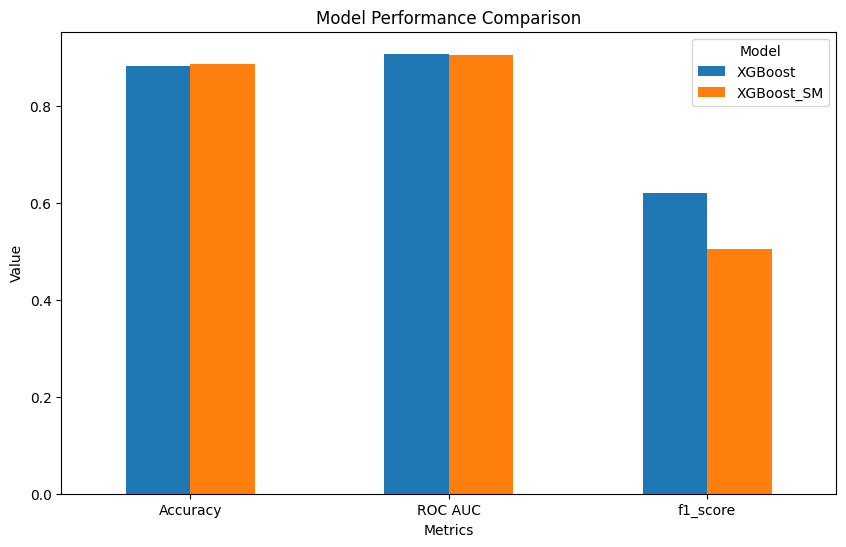

In [650]:
# Create a new DataFrame with the metrics as columns
df_xgb = pd.concat([xgboost_performance_final, xgboost_performance_final_sm], ignore_index=True)

# Transpose the DataFrame for better plotting
df_xgb.set_index('Model').T.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.xticks(rotation=0,size=10)

plt.legend(title='Model')
plt.show()

---

<h2 style="font-size:22px; font-weight:bold; color:pink">🔹Inference from Comparison:</h2>

- Despite applying SMOTE Upsampling, there seems to be no improvement in model performance, even a small degradation in the eval metrics can be seen

- Therefore, sticking to the `scale_pos_weight` tends to be a more optimal solution for XGBoost Classifier


---


## 5.6 XGBoost Classifier Final Evaluation

In [651]:
best_xgb_final

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03716635429098037, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [652]:
print(f"TRAINING SET PERFORMANCE: \n{classification_report(y_train_final, best_xgb_final.predict(X_train_final))}")

TRAINING SET PERFORMANCE: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1144
           1       0.89      1.00      0.94       200

    accuracy                           0.98      1344
   macro avg       0.95      0.99      0.97      1344
weighted avg       0.98      0.98      0.98      1344



In [653]:
print(f"TESTING SET PERFORMANCE: \n{classification_report(y_test_final, y_pred_xgb_final)}")

TESTING SET PERFORMANCE: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       762
           1       0.61      0.63      0.62       134

    accuracy                           0.88       896
   macro avg       0.77      0.78      0.78       896
weighted avg       0.89      0.88      0.88       896



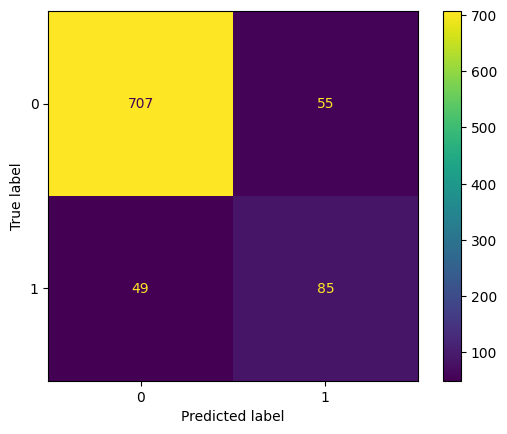

In [654]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test_final, y_pred_xgb_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

---

- This model demonstrates strong performance in predicting customer response to an offer, achieving an overall accuracy of **89%**. It is particularly effective in identifying non-responders (class 0), with a **precision** of **93%**, **recall** of **94%**, and an **F1-score** of **93%**, ensuring that most non-responders are accurately classified.

- For predicting offer acceptance (class 1), the model achieves a **precision** of **61%**, meaning that a moderate portion of customers flagged as likely responders are correctly identified. The **recall** for class 1 is **63%**, and the **F1-score** is **62%**, indicating a moderate balance between precision and recall.

- The **macro average** for precision, recall, and F1-score are **77%**, **78%**, and **78%**, respectively, showing that the model performs fairly across both classes. The **weighted average** values are all ~ **89%**, reflecting that the model's overall performance is influenced by the higher support for non-responders.

> The purpose of using **ROC AUC** as a scoring metric in model optimization is to enhance the model's ability to distinguish between responders and non-responders, especially important in scenarios involving class imbalance as seen in this dataset.

--- 

In [655]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_final, y_pred_proba_xgb_final)
fig = px.line(x=fpr,y=tpr,
        title="ROC Curve of Final XGBoost Model"
              )

fig.update_layout(xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",)

fig.add_trace(go.Scatter(x=fpr, y=tpr, fill='tozeroy',name=f"AUC: {roc_auc_score(y_test_final,y_pred_proba_xgb_final):.2f}"))
fig.show()

## 5.7 Feature Importance Evaluation

In [656]:
def show_feature_importance(model, X):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
    feature_importance.reset_index(drop=True, inplace=True)
    feature_importance

    plt.figure(figsize=(10, 5))
    fig = px.line(x=feature_importance['Feature'], y=feature_importance['Importance'], markers="o",title="Feature Importance",template="plotly_dark",color_discrete_sequence=['pink'])
    fig.update_layout(
        xaxis_title="Feature",
        yaxis_title="Importance",
        font={"family":"Arial", "size":12})

    fig.update_xaxes(tickangle=60)

    fig.show()

In [657]:
show_feature_importance(best_xgb_final, X_train_final)

<Figure size 1000x500 with 0 Axes>

In [658]:
pd.DataFrame({'Feature': X_train_final.columns, 'Importance': best_xgb_final.feature_importances_}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

Feature  Importance
0             total_cmp_accepted    0.186068
1                  accepted_cmp5    0.066738
2              total_days_active    0.059115
3                        recency    0.048435
4                  accepted_cmp3    0.044208
5         marital_status_Married    0.043611
6                  accepted_cmp4    0.043182
7                total_mnt_spent    0.039770
8              mnt_meat_products    0.037396
9           num_web_visits_month    0.036360
10         num_catalog_purchases    0.034961
11           num_store_purchases    0.034454
12                        income    0.031578
13                mnt_gold_prods    0.031053
14           num_deals_purchases    0.031045
15             have_kids_or_teen    0.028464
16  marital_status_Used_to_marry    0.028115
17                 accepted_cmp1    0.027212
18                     education    0.025008
19             mnt_fish_products    0.023605
20                     mnt_wines    0.023059
21                    mnt_fruits    0.021741
22            mnt_sweet_products    0.021053
23             num_web_purchases    0.017879
24                           age    0.015892
25                 accepted_cmp2    0.000000

---

<h2 style="font-size:22px; font-weight:bold; color:pink">🔹Key Insights: Feature Importance Grouped by Key Aspects</h2>

---

**1. Campaign Engagement**:
- The most influential predictor is **total campaigns accepted** (total_cmp_accepted), showing that customer response to campaigns strongly impacts the target outcome. Other campaign-related features, like **accepted_cmp2** and **accepted_cmp4**, also rank highly, reinforcing that engagement with specific campaigns is essential in predicting customer behavior.

**2. Recency and Activity**:
- **Activity recency** (recency) and **total days active** (total_days_active) are crucial indicators, highlighting the importance of recent customer engagement and overall interaction duration on the model's predictions.

**3. Demographic Attributes**:
- **Demographic factors** provide significant predictive power, with **marital status (Married)**, **income**, **education**, and **having children or teens** (have_kids_or_teen) ranking as important predictors. Together, these reflect the role of personal, economic, and family characteristics in shaping customer behavior, with **age** also contributing moderately.

**4. Purchasing Behavior**:
- **Purchase history** metrics, including **store purchases** (num_store_purchases), **catalog purchases** (num_catalog_purchases), and **web visit frequency** (num_web_visits_month), along with specific product spending (e.g., meat and golds), have substantial predictive value. This set of features underscores that both the frequency and diversity of purchasing habits are vital in predicting outcomes.

---